In [138]:

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

from online_algos import CRP

import pandas as pd
import matplotlib.pyplot as plt


PLOT_DATES_TEST_START = '2021-04-06'
PLOT_DATES_TEST_END = '2022-03-31'

ensemble_results_file = 'result.csv'

# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2022-12-30'

# ensemble_results_file = 'result2022.csv'


value_to_remove = "DOW"
# # Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# test = [
# "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT"]


df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


print(df.head())

# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for no-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (7250, 8)
         date        open        high         low       close    volume   tic  \
0  2021-04-06  126.500000  127.129997  125.650002  123.735489  80171300  AAPL   
1  2021-04-06  251.740005  252.539993  248.240005  223.145035   2040100  AMGN   
2  2021-04-06  145.979996  146.529999  144.380005  139.780548   2851200   AXP   
3  2021-04-06  257.209991  259.350006  254.660004  255.169998  11180300    BA   
4  2021-04-06  232.500000  236.679993  230.229996  214.790833   2614500   CAT   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  
Number of rows containing null values: 0
Check for no-nulls
True


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
            date        open        high         low       close    volume  \
0     2021-04-06  126.500000  127.129997  125.650002  123.735489  80171300   
1     2021-04-06  251.740005  252.539993  248.240005  223.145035   2040100   
2     2021-04-06  145.979996  146.529999  144.380005  139.780548   2851200   
3     2021-04-06  257.209991  259.350006  254.660004  255.169998  11180300   
4     2021-04-06  232.500000  236.679993  230.229996  214.790833   2614500   
...          ...         ...         ...         ...         ...       ...   
7245  2022-03-30  515.109985  521.200012  512.479980  502.192535   3041200   
7246  2022-03-30  225.839996  226.160004  222.729996  219.617493   7084000   
7247  2022-03-30   51.220001   51.630001   51.080002   43.250618  23821200   
7248  2022-03-30   47.820000   48.480000   47.290001   40.7121

<Axes: xlabel='date'>

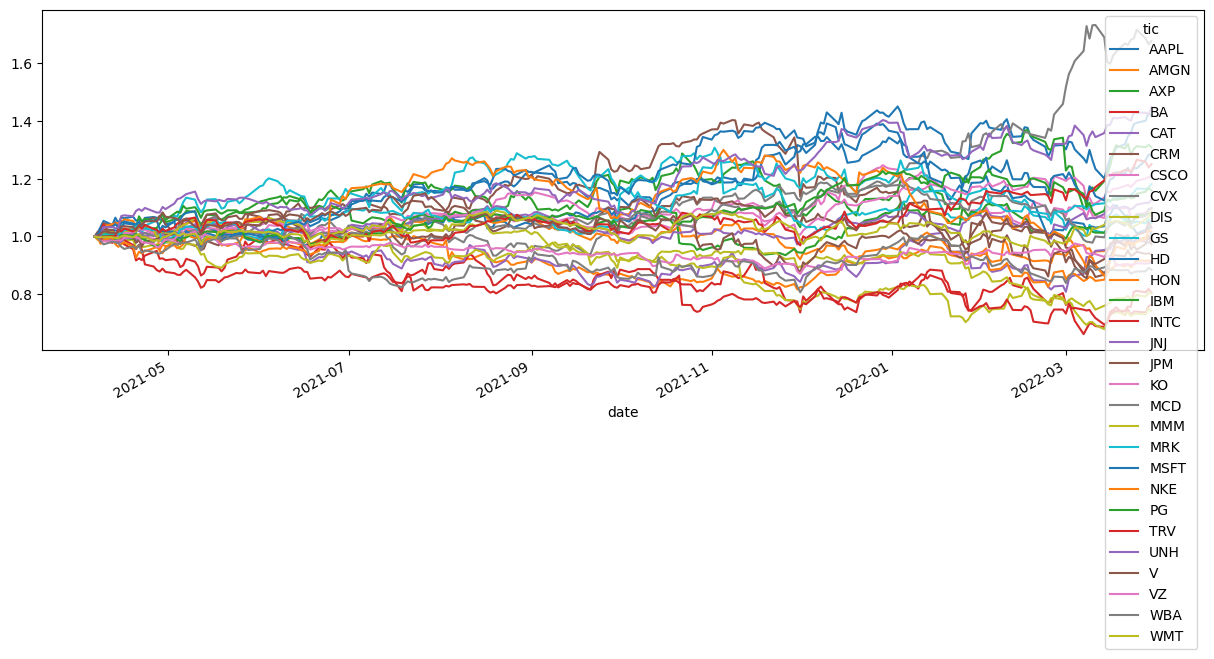

In [139]:
df = pd.DataFrame(df)

print(df.dtypes)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)

(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.67 ± 1.12
    Ulcer index: 2.96
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.67 ± 1.12
    Appraisal ratio (wrt benchmark): 0.00 ± inf
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 8.51%
    Annualized volatility: 12.67%
    Longest drawdown: 58 days
    Max drawdown: 9.18%
    Winning days: 51.0%
    Annual turnover: 2.2
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.65 ± 1.11
    Ulcer index: 2.87
    Information ratio (wrt benchmark): -46.00
    Benchmark sharpe: 0.67 ± 1.12
    Appraisal ratio (wrt benchmark): -2.09 ± 1.03
    Beta / Alpha: 1.00 / -0.219%
    Annualized return: 8.29%
    Annualized volatility: 12.67%
    Longest drawdown: 58 days
    Max drawdown: 9.23%
    Winning days: 51.0%
    Annual turnover: 2.2
        
tic             AAPL      AMGN       AXP        BA       CAT       CRM  \
date                                                                     
2021-04-06  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-04-07  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-04-08  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-04-09  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-04-12  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
...              ...       ...       ...       ...       ..

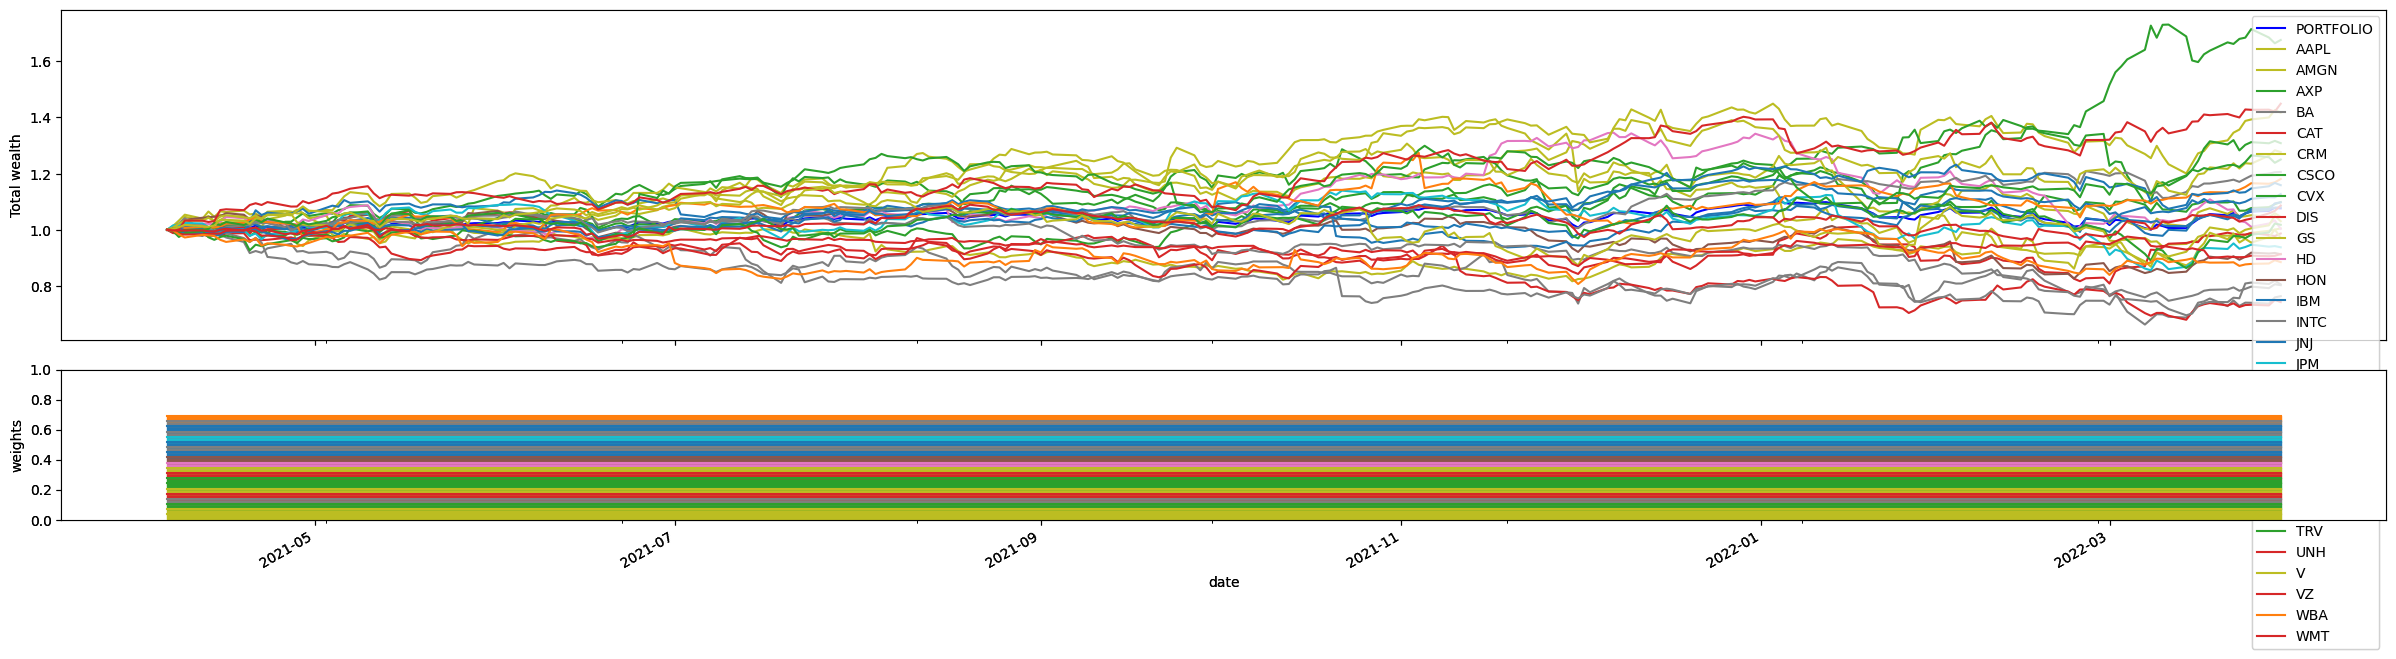

In [140]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())

print(result.B)
print(result.X)

%matplotlib inline
result.plot();

['Date', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
Total of each: [34398.465911865234 34364.335357666016 34386.01483154297 34447.94975280762
 34366.533203125 34337.60284423828 34414.721435546875 34384.89213562012
 34260.62521362305 34384.354248046875 34274.15353393555 34298.009033203125
 34431.5389251709 34405.15254974365 34378.95129394531 34373.97839355469
 34414.5549621582 34287.4853515625 34423.3450012207 34439.38038635254
 34408.43673706055 34363.882232666016 34404.69837188721 34365.09313964844
 34320.485412597656 34308.30993652344 34405.36707305908 34406.37071228027
 34445.62074279785]
[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.0344827

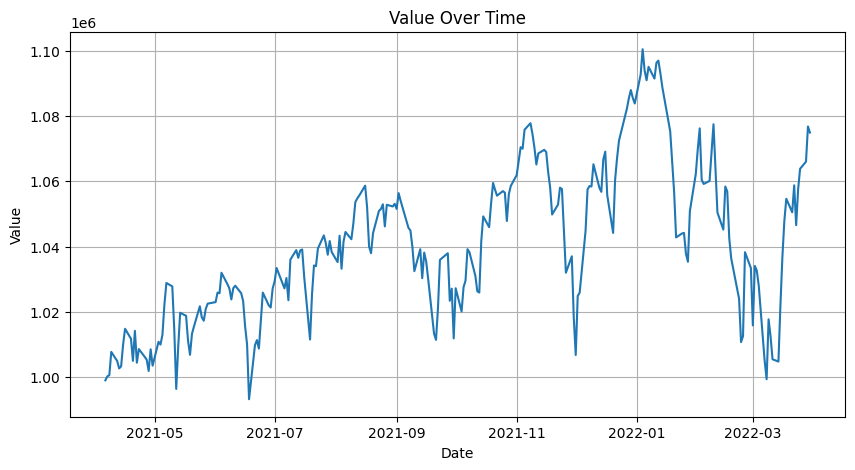

In [149]:
############################
# Run CRP for one defined set of weights:
############################


import numpy as np
import pandas as pd

# Best Target Weights: [0.05134159 0.05536591 0.03931186 0.00328734 0.03819066 0.03555904
#  0.07138025 0.04149361 0.00340795 0.01783727 0.04918175 0.03040992
#  0.06165634 0.00179018 0.05213284 0.00264511 0.0477926  0.00020151
#  0.01354131 0.03167825 0.07287608 0.04810141 0.04723473 0.05420885
#  0.03467866 0.02201975 0.0513923  0.01362611 0.00765681]

new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]

print(new_column_names)

# Convert to the desired format
X = pivot_df.reset_index()
X.columns = new_column_names

# Uniform base case
target_weights = np.ones(len(X.columns)-1) / (len(X.columns)-1)  # target weights for each asset

transaction_cost = 0.001

# Number of steps before the portfolio is allowed to rerebalance
rebalance_step = 1

# TODO still nto as good as a simple buy and hold
initial_cash = 1000000
initial_shares = np.zeros(len(target_weights))

net_worth=[]
transaction_fees=[]

def rebalance_portfolio(cash, shares, target_weights, prices):
    
    # Available amount for purchases of each stock, must factor in the transaction cost 
    current_wealth = (np.sum(prices * shares) + cash) / (1 + transaction_cost)

    target_values = (target_weights * current_wealth)
    target_shares = target_values // (prices)

    shares_to_change = target_shares - shares
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)

    # Calculate cash after selling shares
    cash += np.sum(sell_shares * prices)

    cash -= np.sum(buy_shares * prices)

    transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
    # Sum up all the transaction fees
    transaction_fees.append(transaction_fee)

    shares = target_shares
    remaining_cash = cash - transaction_fee

    assert remaining_cash >= 0
    
    return shares, remaining_cash

portfolio_shares = initial_shares.copy()
portfolio_cash = initial_cash

rebalance_i = 0
# Rebalance at each month
for idx, row in X.iterrows():
    # print(f"\nRebalancing on {row[0].strftime('%Y-%m-%d')}")
    price_per_share = row[1:].values

    rebalance_i -= 1
    if rebalance_i <= 0:
        portfolio_shares, portfolio_cash = rebalance_portfolio(
            portfolio_cash, portfolio_shares, target_weights, price_per_share)
        rebalance_i = rebalance_step
    # print(f"New Portfolio Shares: {portfolio_shares}")
    # print(f"Prices: {row}")

    # print(f"Total of each: {portfolio_shares * price_per_share}")
    # print(f"Cash: {portfolio_cash:.2f}")

    # Calculate total shares
    total_shares = np.sum(portfolio_shares)

    # Calculate the ratio of each share
    share_ratios = portfolio_shares / total_shares

    print(f"Total of each: {portfolio_shares * price_per_share}")
    print(target_weights)
    

    asset_wealth = np.sum(portfolio_shares * price_per_share)
    print(asset_wealth)

    net_worth.append(asset_wealth + portfolio_cash)

print("\nFinal Portfolio:")
print(f"Shares: {portfolio_shares}")
print(f"Total of each: {portfolio_shares * price_per_share}")
print(f"Cash: {portfolio_cash:.2f}")
print(f"Transaction fees: {np.sum(np.array(transaction_fees))}")


print(f"Final Net Worth: {net_worth[-1]}")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()




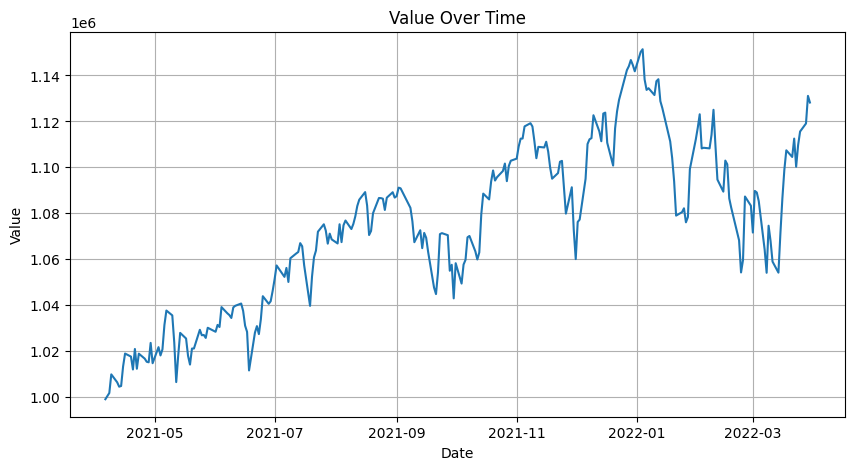


Best Target Weights: [0.07183782 0.01537939 0.02085743 0.00197272 0.0090856  0.07110033
 0.07185057 0.07253902 0.04979735 0.03758713 0.03853234 0.00774365
 0.04887051 0.00874331 0.07060845 0.01124041 0.04621925 0.01659738
 0.04111007 0.01491878 0.036797   0.04329237 0.03013931 0.004068
 0.05474952 0.03869528 0.04074898 0.00860036 0.01631766]
Maximized Net Worth: 1128231.9129431266


In [150]:
#####################################################
# BCRP - Run it many times and find the best random weights
#####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(pivot_df):
    new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]
    X = pivot_df.reset_index()
    X.columns = new_column_names
    return X

def rebalance_portfolio(cash, shares, target_weights, prices, transaction_cost=0.001):
    current_wealth = np.sum(prices * shares) + cash / (1 + transaction_cost)
    target_values = target_weights * current_wealth
    target_shares = target_values // prices
    shares_to_change = target_shares - shares
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    
    cash += np.sum(sell_shares * prices)
    cash -= np.sum(buy_shares * prices)

    transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
    shares = target_shares
    remaining_cash = cash - transaction_fee

    assert remaining_cash >= 0
    
    return shares, remaining_cash

# Note I am rebalancing every X days, this often does even better by optimizing for the best BAH weights and not rebalancing
def evaluate_portfolio(X, target_weights, initial_cash=1000000, rebalance_step=1):
    initial_shares = np.zeros(len(target_weights))
    portfolio_shares = initial_shares.copy()
    portfolio_cash = initial_cash
    net_worth = []
    rebalance_i = 0
    
    for _, row in X.iterrows():
        price_per_share = row[1:].values
        rebalance_i -= 1
        if rebalance_i <= 0:
            portfolio_shares, portfolio_cash = rebalance_portfolio(
                portfolio_cash, portfolio_shares, target_weights, price_per_share)
            rebalance_i = rebalance_step
        
        asset_wealth = np.sum(portfolio_shares * price_per_share)
        net_worth.append(asset_wealth + portfolio_cash)
    
    return net_worth

def find_best_weights(pivot_df, num_iterations=100):
    X = prepare_data(pivot_df)
    best_net_worth = -np.inf
    best_weights = None
    
    for _ in range(num_iterations):
        random_values = np.random.rand(len(X.columns) - 1)
        target_weights = random_values / np.sum(random_values)
        net_worth = evaluate_portfolio(X, target_weights)
        final_net_worth = net_worth[-1]
        
        if final_net_worth > best_net_worth:
            best_net_worth = final_net_worth
            best_weights = target_weights
    
    return best_weights, best_net_worth

# Find the best weights
best_weights, best_net_worth = find_best_weights(pivot_df)

# Evaluate portfolio with the best weights
X = prepare_data(pivot_df)
net_worth = evaluate_portfolio(X, best_weights)

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("\nBest Target Weights:", best_weights)
print("Maximized Net Worth:", best_net_worth)


                0
0    9.990036e+05
1    1.000351e+06
2    1.001724e+06
3    1.009827e+06
4    1.006370e+06
..            ...
245  1.109707e+06
246  1.115590e+06
247  1.119098e+06
248  1.131129e+06
249  1.128232e+06

[250 rows x 1 columns]
          Date  BCRP Net Worth
0   2021-04-06    9.990036e+05
1   2021-04-07    1.000351e+06
2   2021-04-08    1.001724e+06
3   2021-04-09    1.009827e+06
4   2021-04-12    1.006370e+06
..         ...             ...
245 2022-03-24    1.109707e+06
246 2022-03-25    1.115590e+06
247 2022-03-28    1.119098e+06
248 2022-03-29    1.131129e+06
249 2022-03-30    1.128232e+06

[250 rows x 2 columns]
                ensemble           dji
date                                  
2021-04-06  1.000000e+06  1.000000e+06
2021-04-07  9.998617e+05  1.000479e+06
2021-04-08  1.000011e+06  1.002194e+06
2021-04-09  1.001304e+06  1.011079e+06
2021-04-12  1.000007e+06  1.009427e+06
...                  ...           ...
2022-03-28  1.026980e+06  1.045637e+06
2022-03-29  1

<Figure size 1500x500 with 0 Axes>

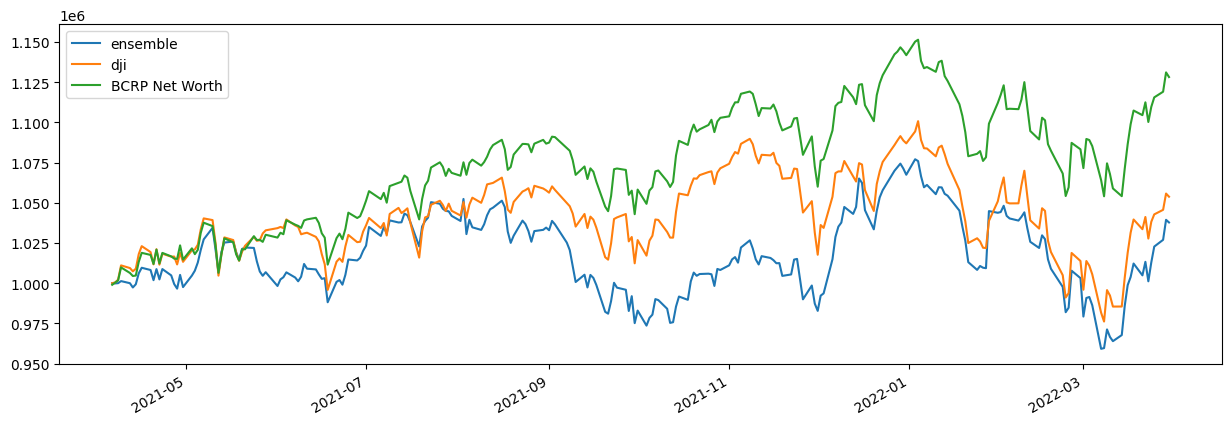

In [151]:
result = pd.DataFrame()

df = pd.DataFrame(net_worth)

print(df)

# Combine the DataFrames side-by-side
combined_df = pd.concat([X.Date, df], axis=1)

combined_df.columns = ["Date", "BCRP Net Worth"]
print(combined_df)

combined_df.set_index('Date', inplace=True)

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_results_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

print(result)

# Join DataFrames on date index
merged_df = result.join(combined_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (249, 8)
Annual return          0.056447
Cumulative returns     0.055757
Annual volatility      0.133905
Sharpe ratio           0.478513
Calmar ratio           0.498493
Stability              0.066912
Max drawdown          -0.113235
Omega ratio            1.082110
Sortino ratio          0.677200
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.987294
Daily value at risk   -0.016616
dtype: float64
df_dji:            date           dji
0   2021-04-06  1.000000e+06
1   2021-04-07  1.000479e+06
2   2021-04-08  1.002194e+06
3   2021-04-09  1.011079e+06
4   2021-04-12  1.009427e+06
..         ...           ...
245 2022-03-24  1.038220e+06
246 2022-03-25  1.042806e+06
247 2022-03-28  1.045637e+06
248 2022-03-29  1.055757e+06
249 2022-03-30           NaN

[250 rows x 2 columns]
df_dji:                       dji
date                    
2021-04-06  1.000000e+06
2021-04-07  1.000479e+06
2021-

<Figure size 1500x500 with 0 Axes>

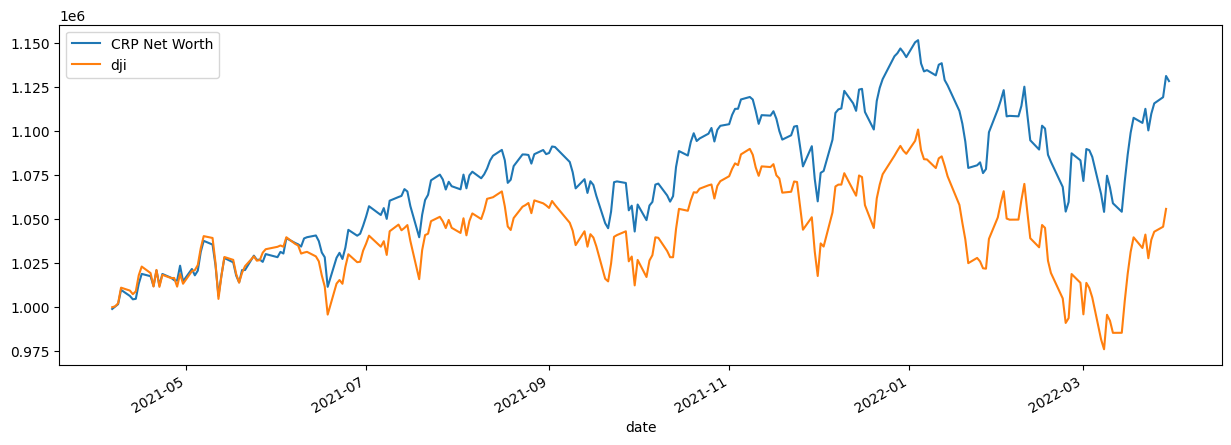

In [152]:
from finrl.plot import backtest_stats,  get_baseline

first_date = combined_df.index.min()
last_date = combined_df.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = combined_df.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_cash
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


combined_df = pd.DataFrame({'date': combined_df.index, 'CRP Net Worth': combined_df['BCRP Net Worth']})
combined_df = combined_df.set_index('date')

print("df_result_bah.columns: ", combined_df.columns)

print("df_result_bah: ", combined_df)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(combined_df, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();